### 1. 라이브러리 불러오기

In [75]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

### 2. 데이터 불러오기

In [76]:
path = '/content/drive/MyDrive/고려대취업사관학교/data/(8회차 수업실습)주가지수 상관관계 분석.xlsx의 사본.xlsx'

kospi = pd.read_excel(path, sheet_name = 0)
kospi

,날짜,시가,고가,저가,종가
0,2019-01-02,263.35,263.77,257.47,258.23
1,2019-01-03,258.19,258.70,255.35,255.77
2,2019-01-04,255.62,258.12,254.55,257.89
3,2019-01-07,261.11,263.13,260.76,261.57
4,2019-01-08,261.29,262.43,259.39,259.65
...,...,...,...,...,...
879,2022-07-25,316.40,320.07,316.20,318.34
880,2022-07-26,317.39,319.91,317.03,319.61
881,2022-07-27,319.83,320.04,317.30,319.74
882,2022-07-28,322.89,323.73,320.76,321.62


In [77]:
sp = pd.read_excel(path, sheet_name = 1)
sp

,Date,Close,Open,High,Low
0,2019-01-02,2510.03,2476.96,2519.49,2467.47
1,2019-01-03,2447.89,2491.92,2493.14,2443.96
2,2019-01-04,2531.94,2474.33,2538.07,2474.33
3,2019-01-07,2549.69,2535.61,2566.16,2524.56
4,2019-01-08,2574.41,2568.11,2579.82,2547.56
...,...,...,...,...,...
896,2022-07-25,3966.84,3965.72,3975.30,3943.46
897,2022-07-26,3921.05,3953.22,3953.22,3910.74
898,2022-07-27,4023.61,3951.43,4039.56,3951.43
899,2022-07-28,4072.43,4026.13,4078.95,3992.97


In [78]:
kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      884 non-null    datetime64[ns]
 1   시가      884 non-null    float64       
 2   고가      884 non-null    float64       
 3   저가      884 non-null    float64       
 4   종가      884 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 34.7 KB


In [79]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    901 non-null    datetime64[ns]
 1   Close   901 non-null    float64       
 2   Open    901 non-null    float64       
 3   High    901 non-null    float64       
 4   Low     901 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 35.3 KB


In [80]:
### 3. 데이터 병합하기

In [81]:
kospi = kospi[['날짜','종가']]

In [82]:
sp = sp.iloc[:,[0,1]]

In [83]:
# pd.concat([kospi,sp])

df = pd.merge(kospi, sp, how = 'inner', left_on = '날짜', right_on = 'Date')

In [84]:
df.drop('Date', axis = 1, inplace = True)

In [85]:
df

,날짜,종가,Close
0,2019-01-02,258.23,2510.03
1,2019-01-03,255.77,2447.89
2,2019-01-04,257.89,2531.94
3,2019-01-07,261.57,2549.69
4,2019-01-08,259.65,2574.41
...,...,...,...
851,2022-07-25,318.34,3966.84
852,2022-07-26,319.61,3921.05
853,2022-07-27,319.74,4023.61
854,2022-07-28,321.62,4072.43


In [86]:
df.columns = ['date', 'kospi200', 'sp500']

In [87]:
df.head()

,date,kospi200,sp500
0,2019-01-02,258.23,2510.03
1,2019-01-03,255.77,2447.89
2,2019-01-04,257.89,2531.94
3,2019-01-07,261.57,2549.69
4,2019-01-08,259.65,2574.41


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 855
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      856 non-null    datetime64[ns]
 1   kospi200  856 non-null    float64       
 2   sp500     856 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 26.8 KB


### 4. 데이터 시각화

In [89]:
import matplotlib.pyplot as plt

#### index : date 

In [90]:
# 1

df.index = df['date']

df

,date,kospi200,sp500
date,,,
2019-01-02,2019-01-02,258.23,2510.03
2019-01-03,2019-01-03,255.77,2447.89
2019-01-04,2019-01-04,257.89,2531.94
2019-01-07,2019-01-07,261.57,2549.69
2019-01-08,2019-01-08,259.65,2574.41
...,...,...,...
2022-07-25,2022-07-25,318.34,3966.84
2022-07-26,2022-07-26,319.61,3921.05
2022-07-27,2022-07-27,319.74,4023.61


In [91]:
df.drop('date', axis= 1, inplace=True)

df

,kospi200,sp500
date,,
2019-01-02,258.23,2510.03
2019-01-03,255.77,2447.89
2019-01-04,257.89,2531.94
2019-01-07,261.57,2549.69
2019-01-08,259.65,2574.41
...,...,...
2022-07-25,318.34,3966.84
2022-07-26,319.61,3921.05
2022-07-27,319.74,4023.61


In [57]:
# 2

df.set_index('date', inplace = True)
df

,kospi200,sp500
date,,
2019-01-02,258.23,2510.03
2019-01-03,255.77,2447.89
2019-01-04,257.89,2531.94
2019-01-07,261.57,2549.69
2019-01-08,259.65,2574.41
...,...,...
2022-07-25,318.34,3966.84
2022-07-26,319.61,3921.05
2022-07-27,319.74,4023.61


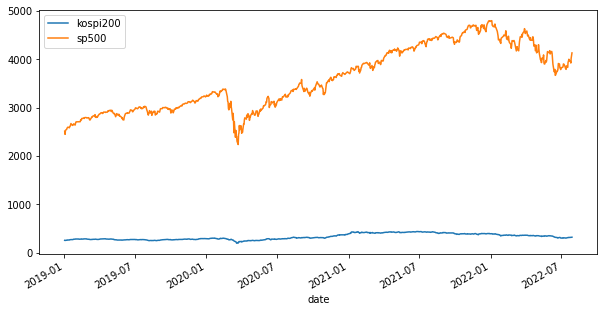

In [92]:
df.plot(figsize = (10,5))

plt.show()

In [94]:
# (비교시점가격 / 기준시점가격) * 100

df.iloc[0] # 기준 시점

kospi200     258.23
sp500       2510.03
Name: 2019-01-02 00:00:00, dtype: float64

In [98]:
df_in = (df / df.iloc[0]) * 100

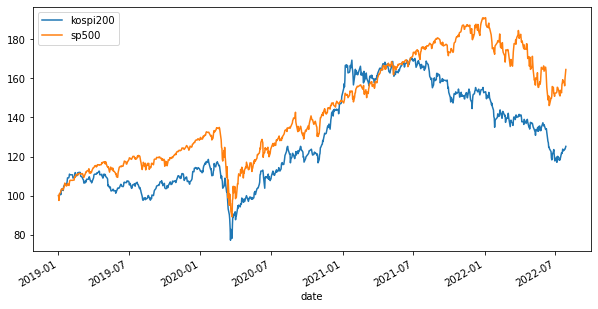

In [99]:
df_in.plot(figsize = (10,5))

plt.show()

### 5. 상관관계 분석

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
# 산점도

x = df_in['sp500'].values

In [102]:
print(x.size)
print(x.ndim)
print(x.shape)

856
1
(856,)


In [103]:
type(x)

numpy.ndarray

In [105]:
y = df_in['kospi200'].values

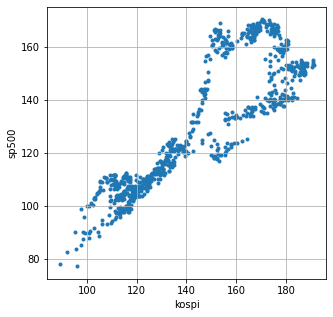

In [112]:
plt.figure(figsize = (5,5))
plt.scatter(x,y, marker = '.')
plt.xlabel('kospi')
plt.ylabel('sp500')
plt.grid()
plt.show()

In [115]:
X = x.reshape(-1,1)

In [116]:
X.ndim

2

In [117]:
X.shape

(856, 1)

In [118]:
type(X)

numpy.ndarray

In [119]:
Y = y.reshape(-1,1)

In [120]:
Y.ndim

2

In [122]:
Y.shape

(856, 1)

In [123]:
model = LinearRegression()

In [125]:
model.fit(X, Y)

LinearRegression()

In [126]:
model.coef_

array([[0.79980392]])

In [127]:
model.intercept_

array([14.19882933])

In [128]:
model.score(X, Y)

0.7746316347399449

In [135]:
pre_Y = model.predict(X)

pre_Y[-10:]

array([[136.26624858],
       [139.6387679 ],
       [140.3783387 ],
       [141.62264028],
       [140.43346397],
       [140.59947706],
       [139.14040998],
       [142.40841434],
       [143.96403031],
       [145.80769969]])

In [134]:
Y[-10:]

array([[121.93393486],
       [121.55830074],
       [122.37927429],
       [123.79661542],
       [122.88657398],
       [123.27769818],
       [123.7695078 ],
       [123.81985052],
       [124.54788367],
       [125.202339  ]])

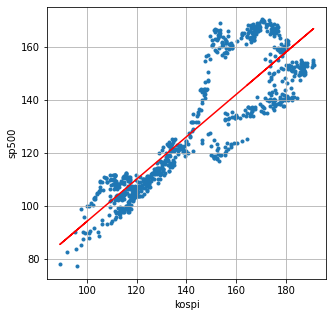

In [137]:
plt.figure(figsize = (5,5))

plt.scatter(x,y, marker = '.')
plt.plot(x,model.predict(X), color='red')

plt.xlabel('kospi')
plt.ylabel('sp500')
plt.grid()
plt.show()

In [138]:
# method : pearson, kendall, spearman

df_in.corr() # 기본값 pearson

,kospi200,sp500
kospi200,1.000000,0.880132
sp500,0.880132,1.000000


In [140]:
df_in['kospi200'].corr(df_in['sp500'])

0.8801316008074846

In [143]:
r = df_in['kospi200'].corr(df_in['sp500'])

In [144]:
r_squared = r ** 2

In [145]:
r_squared

0.7746316347399456

In [146]:
import seaborn as sns

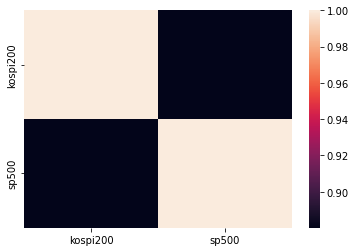

In [148]:
sns.heatmap(df_in.corr(method = 'pearson'))

plt.show()